In [1]:
%pylab inline 
import yt 
import plot_is

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin/

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


Checking pressure profile 

In [3]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
from yt.mods import *

In [24]:
rho_c = 0.02806
scale_d = 3.92e-18
def compareplot1Dprofile(timestep):
    pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    sp = pf.sphere(pf.domain_center, (0.32,"pc"))
    rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
    plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
    xi_max = 6.451
    def solvr(Y, t):
        return [Y[1], exp(-Y[0])-2/t*Y[1]]
    xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
    asol = integrate.odeint(solvr, [0, 0], xi)
    rho = np.exp(-asol[:,0]) #rho/rho_c
    r = xi/1.05e-17 #[cm]
    #1cm = 3.24077929e-19 Parsecs
    plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
    plt.xlabel("Physical radius [pc]",fontsize=15)
    plt.ylabel("Density[g/cm^3]",fontsize=15)
    plt.legend(loc='upper right',prop={'size':12},numpoints=1)

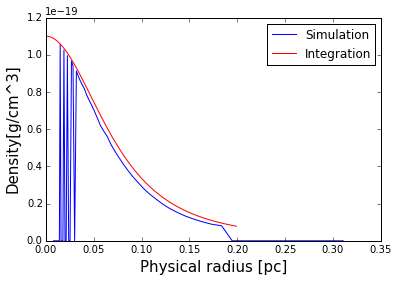

In [17]:
compareplot1Dprofile(1)

Oops in my previous code I was mislead to think that the fudge factor fixed the thing but I ran the code actually with the fudge factor, so this is not good. 

Now I remove that boxlen/30 factor (this is precisely 1.1)

In [48]:
import seaborn as sns
import mpld3 
# mpld3.enable_notebook()
mpld3.disable_notebook()

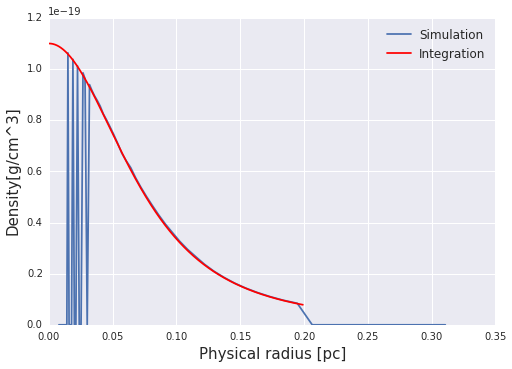

In [49]:
compareplot1Dprofile(1)

okay now it actually is the right thing . So the conclusion is that xx,yy,zz are already in code units NOT grid units (as previously thought) 

In [42]:
rho_c = 0.02806
scale_d = 3.92e-18
def compareplot1Dprofile_pressure(timestep):
    pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    sp = pf.sphere(pf.domain_center, (0.32,"pc"))
    rp = yt.create_profile(sp,'radius','pressure')#,units={'radius':'pc'},logs={'radius':False})
    plt.plot(rp.x.value*3.24077929e-19,rp["pressure"].in_units("g/(cm*s**2)").value,label="Simulation")
    xi_max = 6.451
    def solvr(Y, t):
        return [Y[1], exp(-Y[0])-2/t*Y[1]]
    xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
    asol = integrate.odeint(solvr, [0, 0], xi)
    rho = np.exp(-asol[:,0]) #rho/rho_c
    r = xi/1.05e-17 #[cm]
    #1cm = 3.24077929e-19 Parsecs
    plt.plot(r*3.24077929e-19,rho*rho_c*scale_d*8.26e8,label ='Integration',color="red")#$\rho$')
    plt.xlabel("Physical radius [pc]",fontsize=15)
    plt.ylabel("Pressure[$g/cm s^2$]",fontsize=15)
    plt.legend(loc='upper right',prop={'size':12},numpoints=1)

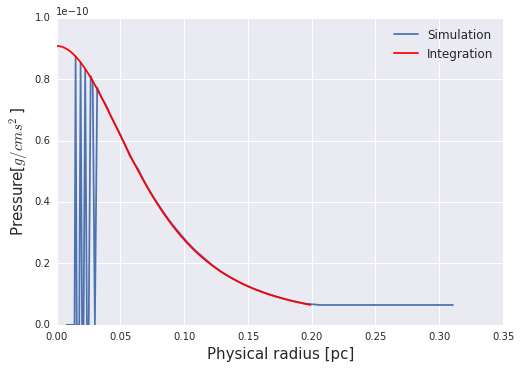

In [44]:
compareplot1Dprofile_pressure(1)


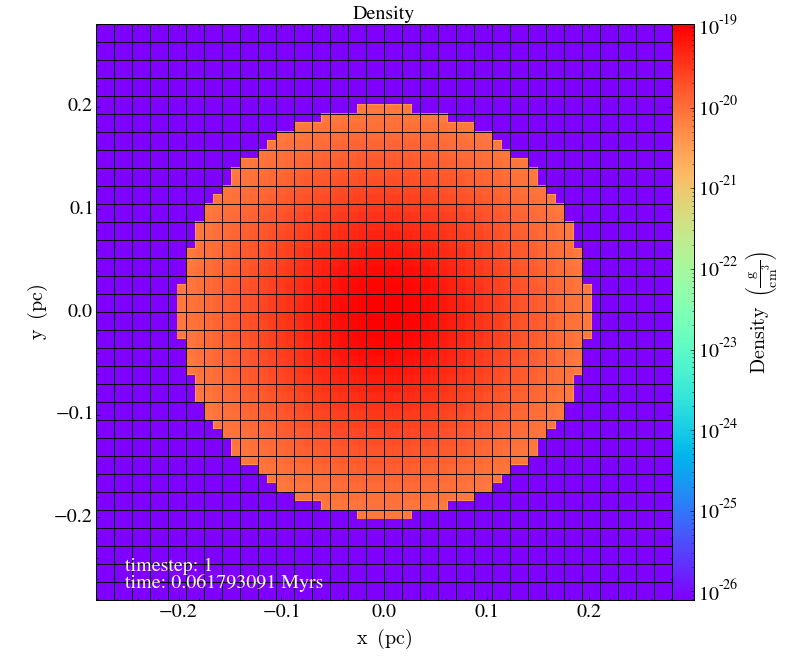


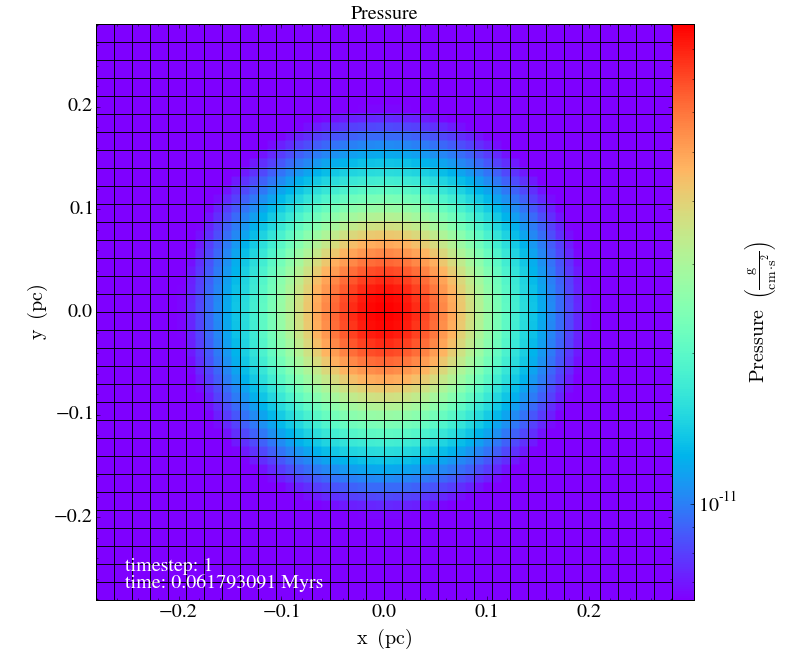


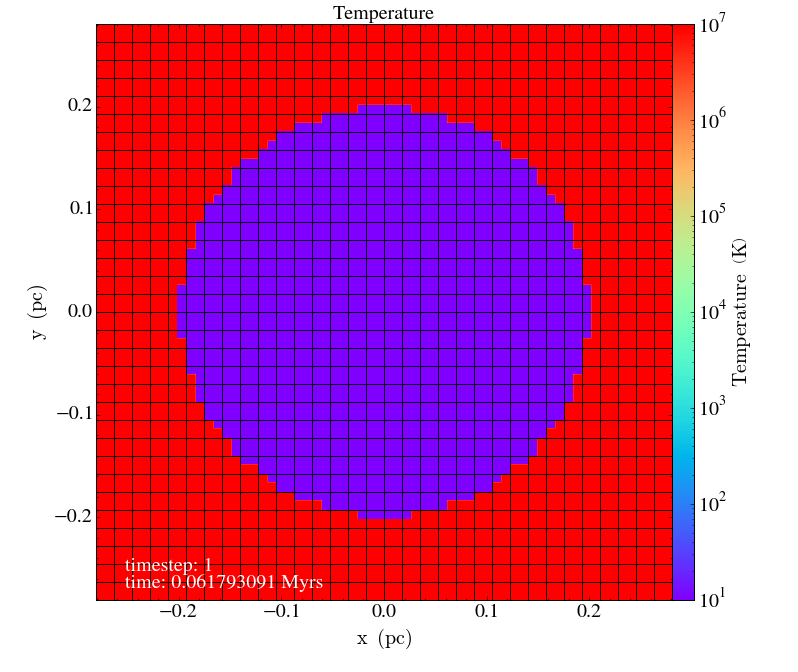

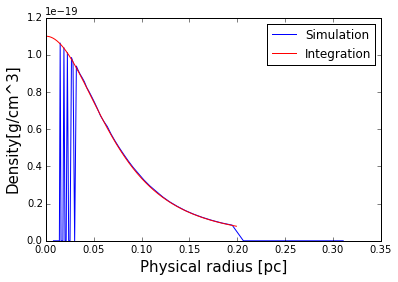

In [20]:
plot_is.plot_time_slice("density",1,title="Density")
plot_is.plot_time_slice("pressure",1,title="Pressure")
plot_is.plot_time_slice("temperature",1,title="Temperature")
compareplot1Dprofile(1)

Don't use seaborn with the plot_time_slice , white grid will be mistaken as AMR refinement !!'


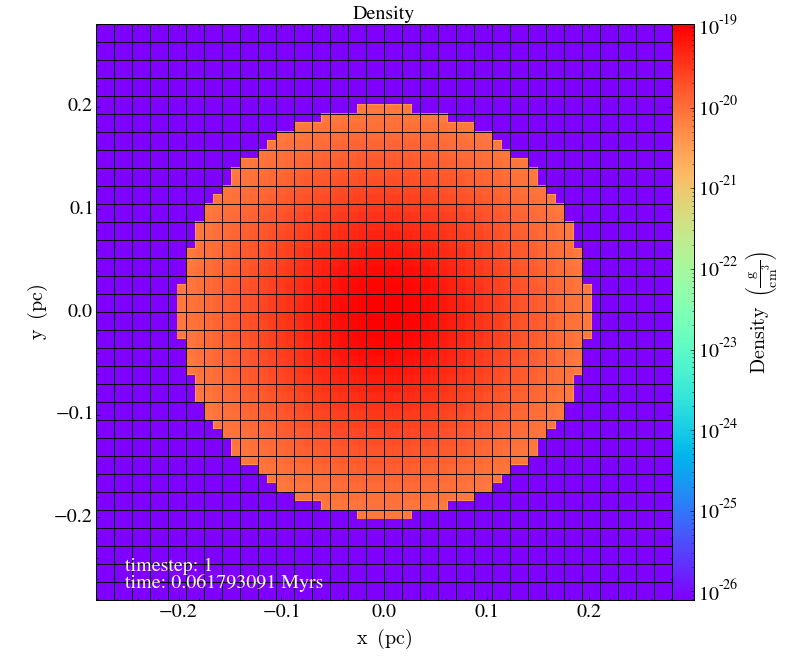


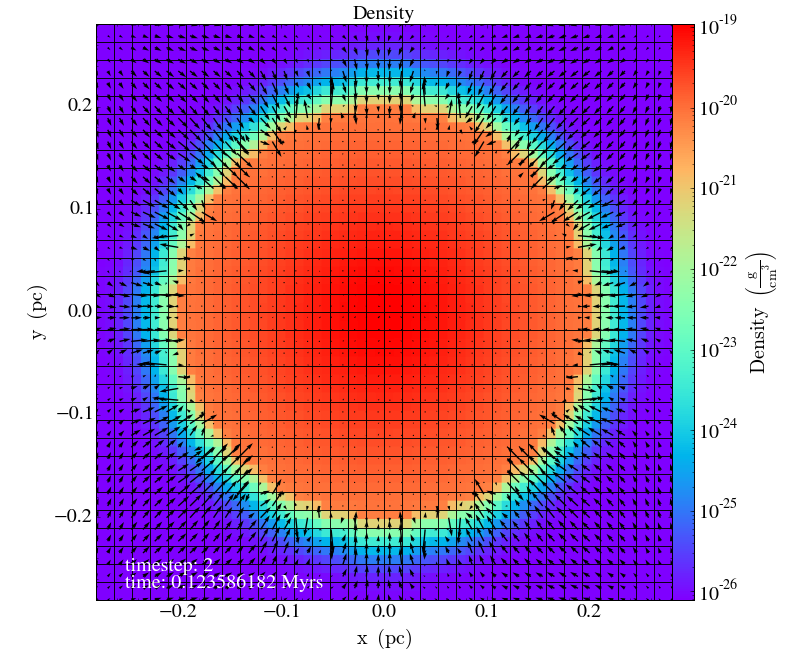


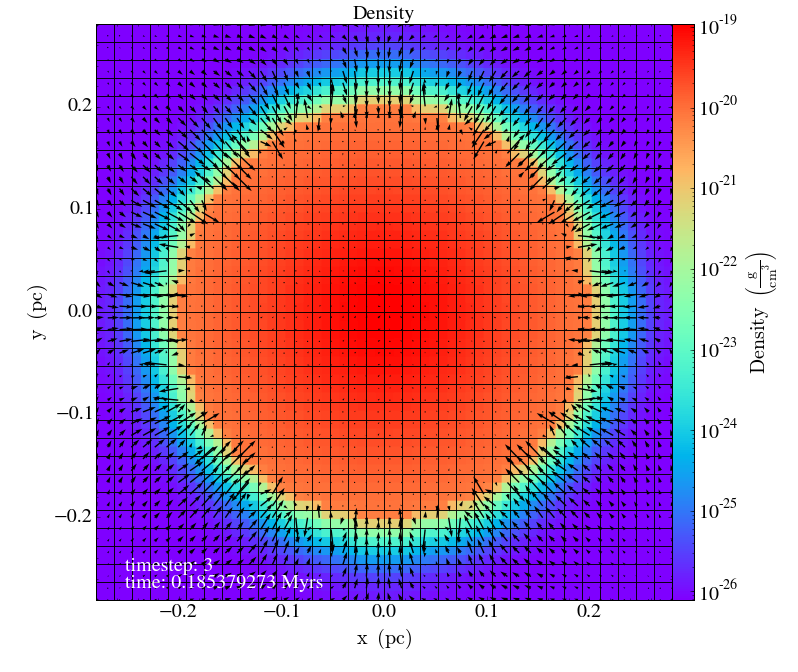


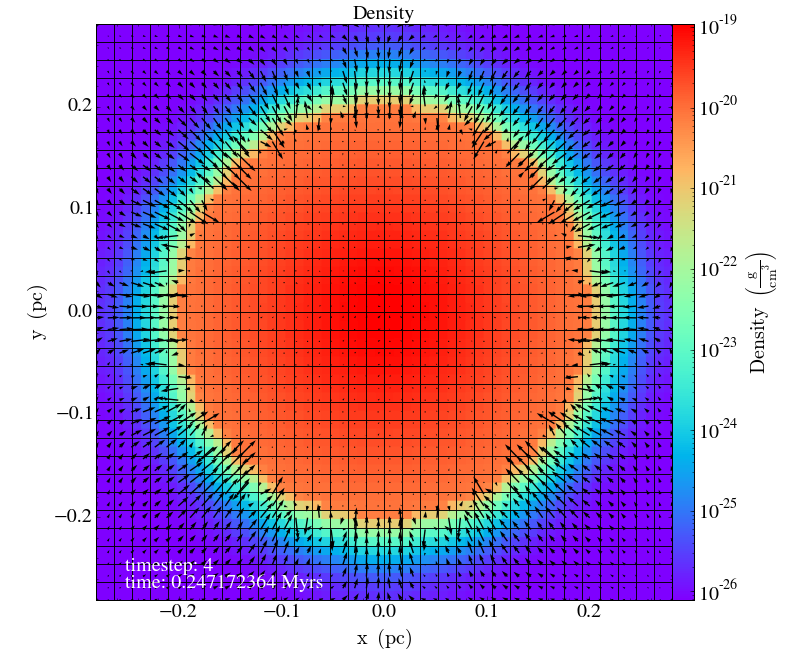


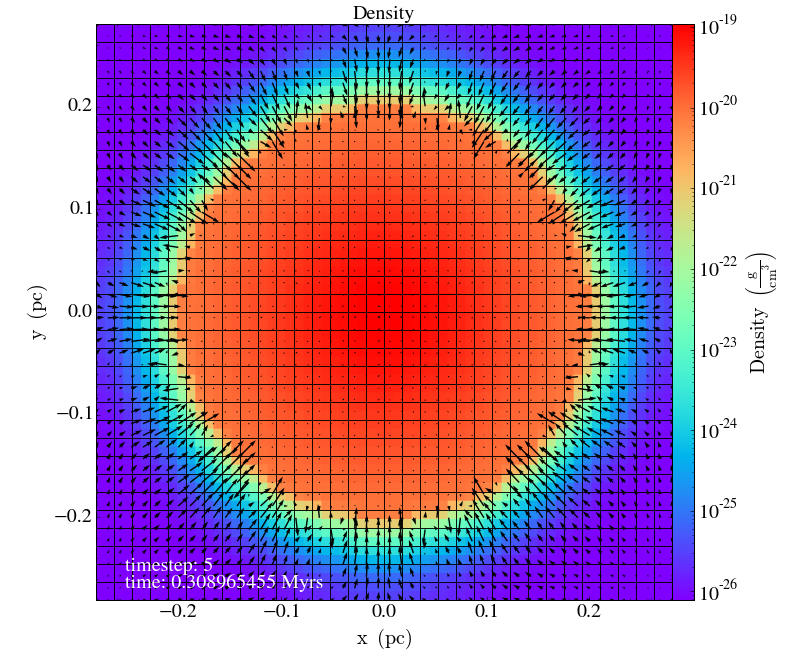


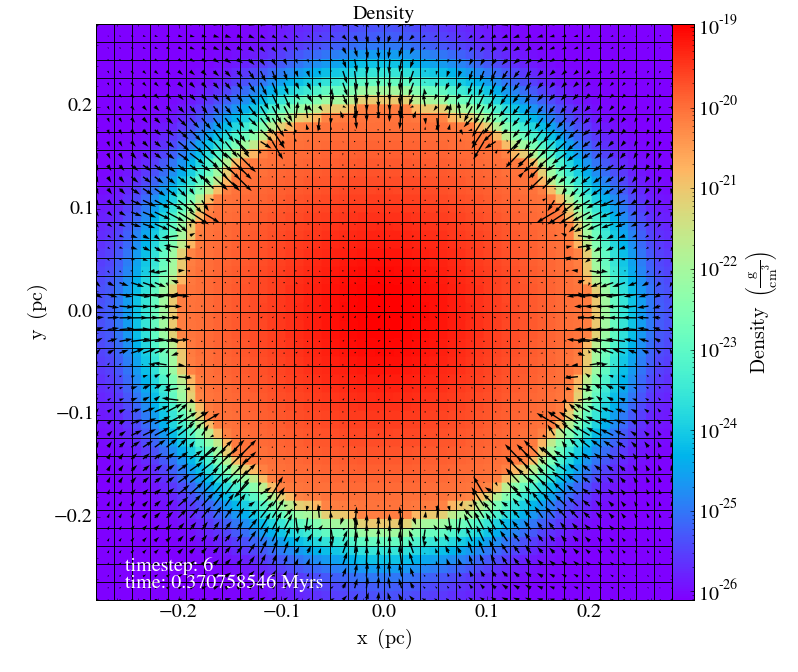


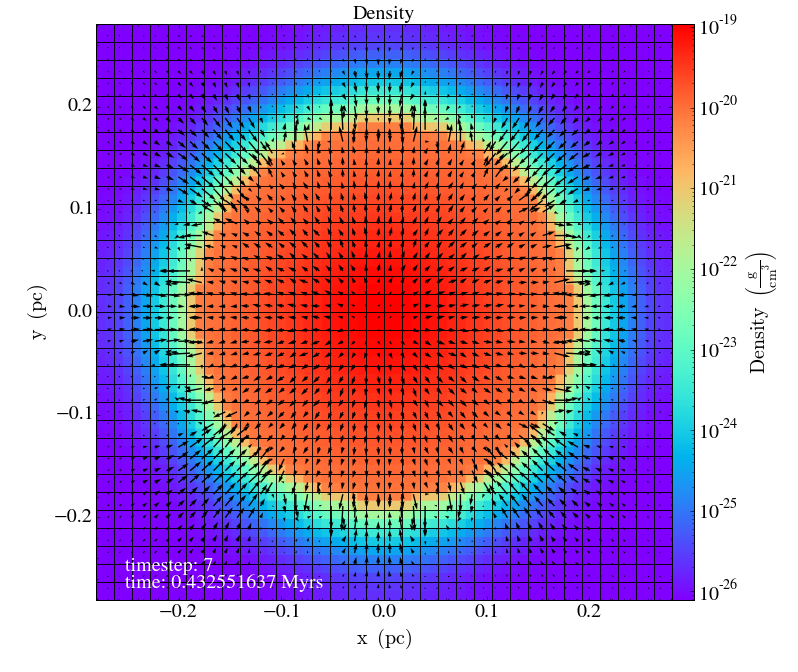


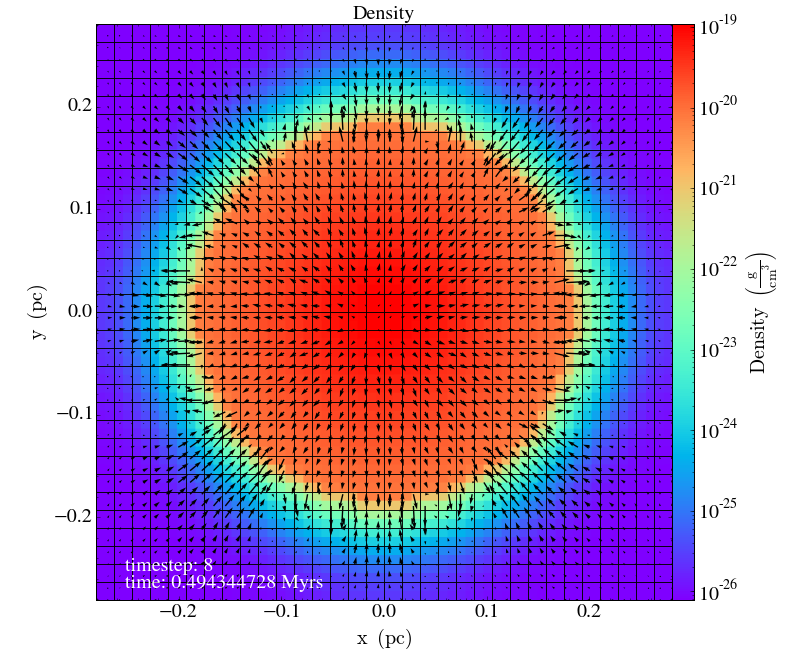


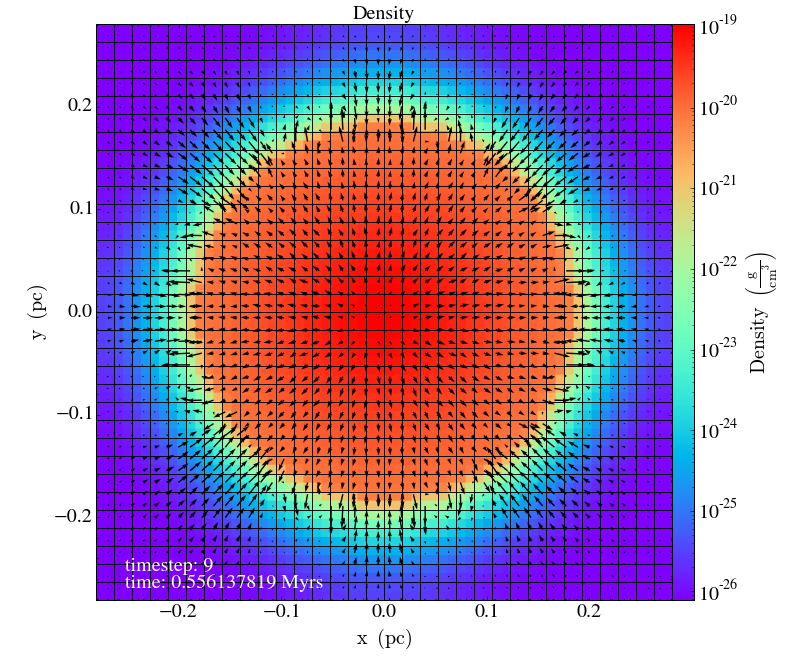

In [4]:
for i in np.arange(1,10):
    plot_is.plot_time_slice("density",i,title="Density")